In [1]:
import pandas as pd
import numpy as np 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/anubhav08/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv('Text Reviews.csv')
df.dtypes

title    object
dtype: object

In [3]:
print(df.shape)

(75, 1)


In [4]:
messages = " ".join([str(i) for i in df['title']])
words = word_tokenize(messages)

In [5]:
messages

"It's give me convenience carrying 5 different shades in a very compact way.I love the natural colour they offer The product is OK as it has different types of lipstick colours, but it won't last fro a long time. I needed nude shades that I can mix with darker shades to come up with my own colours. I find this pretty perfect for that purpose. The Mocha brown is great as it is, as is the pink nude. But I prefer to mix in other colours with th 3 other shades. This colour palette might suit a fairer complexion more as the shades are light, but they are pretty. If you're looking for smudge or transfer proof / long lasting lipstick, this product may not be what you're looking for. I got 5 shades for 372 on a deal and I'm happy with Renee as well as Amazon. I plan to use the product carefully, as constantly moving the lip colours around might damage the lipsticks. Like the color and knowing that it is vegan. However, this is the second time, that it broke. I used it maybe 5 times and the top

In [6]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [7]:
lowered = clean_words(words)

In [8]:
bow = Counter(lowered)
bow

Counter({'give': 1,
         'convenience': 1,
         'carrying': 1,
         'different': 4,
         'shade': 14,
         'compact': 1,
         'love': 1,
         'natural': 2,
         'colour': 8,
         'offer': 1,
         'product': 8,
         'ok': 1,
         'type': 1,
         'lipstick': 9,
         'wo': 2,
         'last': 2,
         'fro': 1,
         'long': 5,
         'time': 3,
         'needed': 1,
         'nude': 2,
         'mix': 2,
         'darker': 1,
         'come': 1,
         'find': 1,
         'pretty': 3,
         'perfect': 2,
         'purpose': 1,
         'mocha': 1,
         'brown': 2,
         'great': 3,
         'pink': 2,
         'prefer': 1,
         'th': 1,
         'palette': 1,
         'might': 3,
         'suit': 1,
         'fairer': 1,
         'complexion': 1,
         'light': 1,
         'looking': 3,
         'smudge': 2,
         'transfer': 1,
         'proof': 2,
         'lasting': 3,
         'may': 1,
         'go

In [9]:
data = pd.DataFrame(bow.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

In [10]:
data = data.head(10)

<AxesSubplot:xlabel='frequency', ylabel='word'>

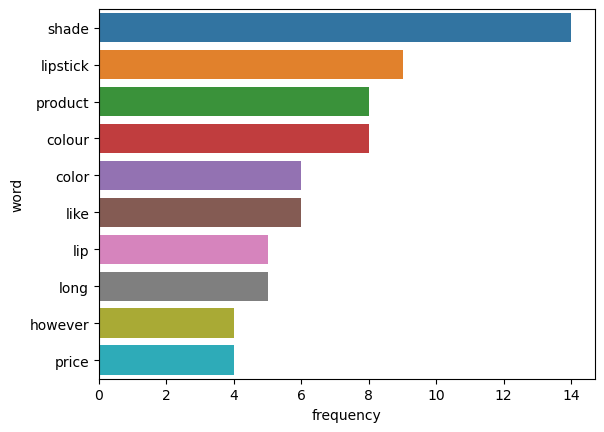

In [11]:
sns.barplot(x='frequency',y='word',data=data)